# Dự đoán phần trăm công suất, sử dụng thư viện

# Đọc dữ liệu

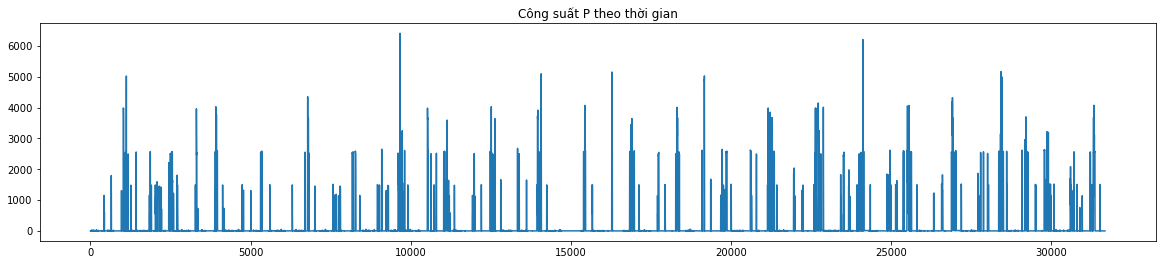

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20, 4)

# ----------READ DATA-------------
# Power dataframe
p_df = pd.read_csv('./data/W.csv',
                   names=['time', 'light', 'socket', 'heater', 'aircond1', 'aircond2', 'aircond3', 'indcooker'],
                   header=0)
# Voltage dataframe
u_df = pd.read_csv('./data/V.csv',
                   names=['time', 'u'],
                   header=0)
# Current dataframe
i_df = pd.read_csv('./data/A.csv',
                   names=['time', 'light', 'socket', 'heater', 'aircond1', 'aircond2', 'aircond3', 'indcooker'],
                   header=0)
# Power factor dataframe
pf_df = pd.read_csv('./data/cosphi.csv',
                    names=['time', 'light', 'socket', 'heater', 'aircond1', 'aircond2', 'aircond3', 'indcooker'],
                    header=0)

# Reactive power dataframe
q_df = pd.DataFrame()
q_df['time'] = p_df['time']
column_names = ['light', 'socket', 'heater', 'aircond1', 'aircond2', 'aircond3', 'indcooker']

# Calculate reactive power using P and cosphi
for col_name in column_names:
    q_df[col_name] = np.tan(np.arccos(pf_df[col_name])) * p_df[col_name]

select_device = ['heater', 'indcooker']

p_sum = p_df[select_device].sum(axis=1).to_numpy()
q_sum = q_df[select_device].sum(axis=1).to_numpy()
u_sum = u_df['u'].to_numpy()  # không cần tính tổng U, nhưng cứ đặt là u_sum cho đồng nhất
i_sum = i_df[select_device].sum(axis=1).to_numpy()

plt.title("Công suất P theo thời gian")
plt.plot(p_sum)
plt.show()


light    : chiếu sáng  
socket   : ổ cắm phòng khách + bếp + ngủ  
heater   : bình nóng lạnh  
aircond1 : điều hoà 1 & 2  
aircond2 : điều hoà 3  
aircond3 : điều hoà phòng khách  
indcooker: bếp từ  

# Chuẩn bị tập dữ liệu

In [45]:
data = []
label = []
for t in range(0, len(p_sum)):
    data.append([u_sum[t] / 1000, i_sum[t] , p_sum[t] / 1000, q_sum[t] / 1000])
    percent = []
    for j, device_name in enumerate(select_device):
        if p_sum[t] == 0:
            percent.append(0)
        else:
            percent.append(p_df[device_name].iloc[t] / p_sum[t])
    label.append(percent)
        
print("num data point =", len(data))


X = np.array(data)
y = np.array(label)
print(f'{X.shape=}')
print(f'{y.shape=}')
print(f'{X[0:10]=}')
print(f'{y[0:10]=}')

num data point = 31680
X.shape=(31680, 4)
y.shape=(31680, 2)
X[0:10]=array([[0.231     , 0.25      , 0.001     , 0.04999   ],
       [0.23      , 0.25      , 0.0035    , 0.05822824],
       [0.23      , 0.25      , 0.006     , 0.05969925],
       [0.23      , 0.25      , 0.0035    , 0.05822824],
       [0.23      , 0.25      , 0.001     , 0.04999   ],
       [0.23      , 0.25      , 0.001     , 0.04999   ],
       [0.23      , 0.25      , 0.001     , 0.04999   ],
       [0.23      , 0.25      , 0.004     , 0.05700269],
       [0.23      , 0.25      , 0.005     , 0.05861064],
       [0.23      , 0.25      , 0.002     , 0.05710785]])
y[0:10]=array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])


## Train

In [70]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(solver='adam',  
                    hidden_layer_sizes=20, 
                    random_state=42, 
                    max_iter=100000, 
                    verbose=True, 
                    learning_rate='adaptive',
                    activation='relu',
                    learning_rate_init=0.0015,
                    n_iter_no_change=200,
                    tol=0.0001,
                    batch_size=5000,
                    early_stopping=True)
model.out_activation_ = 'sigmoid'
model.fit(X, y)
model.score(X, y)

Iteration 1, loss = 82310022232861917184.00000000
Validation score: -4.093519
Iteration 2, loss = 72549318073658204160.00000000
Validation score: -4.098439
Iteration 3, loss = 61511667207848558592.00000000
Validation score: -4.051695
Iteration 4, loss = 55485994093058154496.00000000
Validation score: -4.041788
Iteration 5, loss = 46195651490870640640.00000000
Validation score: -4.013399
Iteration 6, loss = 38099816113494220800.00000000
Validation score: -3.937036
Iteration 7, loss = 35055879620379529216.00000000
Validation score: -3.998214
Iteration 8, loss = 27415259900588998656.00000000
Validation score: -3.935621
Iteration 9, loss = 25087602216127193088.00000000
Validation score: -3.932647
Iteration 10, loss = 20160148523890946048.00000000
Validation score: -3.839623
Iteration 11, loss = 15805194273819852800.00000000
Validation score: -3.619806
Iteration 12, loss = 13466588037745596416.00000000
Validation score: -3.381972
Iteration 13, loss = 11323309928404150272.00000000
Validation

Iteration 124, loss = 197053.32052448
Validation score: 0.295401
Iteration 125, loss = 68016.59492982
Validation score: 0.295818
Iteration 126, loss = 211279.43950857
Validation score: 0.295904
Iteration 127, loss = 180391.09323261
Validation score: 0.296217
Iteration 128, loss = 11800.80903722
Validation score: 0.296366
Iteration 129, loss = 31809.15953712
Validation score: 0.296874
Iteration 130, loss = 29475.07459173
Validation score: 0.296862
Iteration 131, loss = 7435.28542103
Validation score: 0.297242
Iteration 132, loss = 15108.87778660
Validation score: 0.297606
Iteration 133, loss = 9577.21824129
Validation score: 0.297740
Iteration 134, loss = 974.68040955
Validation score: 0.298055
Iteration 135, loss = 7164.02380064
Validation score: 0.298364
Iteration 136, loss = 1743.72145247
Validation score: 0.298709
Iteration 137, loss = 38.56421858
Validation score: 0.298952
Iteration 138, loss = 1218.99007540
Validation score: 0.299206
Iteration 139, loss = 811.44600583
Validation s

Iteration 264, loss = 0.04167360
Validation score: 0.395216
Iteration 265, loss = 0.04154343
Validation score: 0.396290
Iteration 266, loss = 0.04141384
Validation score: 0.397901
Iteration 267, loss = 0.04128182
Validation score: 0.399283
Iteration 268, loss = 0.04114923
Validation score: 0.400682
Iteration 269, loss = 0.04101495
Validation score: 0.402230
Iteration 270, loss = 0.04088155
Validation score: 0.403471
Iteration 271, loss = 0.04074568
Validation score: 0.405135
Iteration 272, loss = 0.04060948
Validation score: 0.406360
Iteration 273, loss = 0.04047282
Validation score: 0.408071
Iteration 274, loss = 0.04033471
Validation score: 0.409305
Iteration 275, loss = 0.04019618
Validation score: 0.411044
Iteration 276, loss = 0.04005622
Validation score: 0.412247
Iteration 277, loss = 0.03991615
Validation score: 0.414240
Iteration 278, loss = 0.03977445
Validation score: 0.414995
Iteration 279, loss = 0.03963146
Validation score: 0.417103
Iteration 280, loss = 0.03948779
Validat

Iteration 409, loss = 0.01903113
Validation score: 0.643429
Iteration 410, loss = 0.01889490
Validation score: 0.644803
Iteration 411, loss = 0.01876095
Validation score: 0.646439
Iteration 412, loss = 0.01862894
Validation score: 0.647943
Iteration 413, loss = 0.01849529
Validation score: 0.649232
Iteration 414, loss = 0.01835977
Validation score: 0.650897
Iteration 415, loss = 0.01822757
Validation score: 0.652341
Iteration 416, loss = 0.01809632
Validation score: 0.653897
Iteration 417, loss = 0.01796482
Validation score: 0.655248
Iteration 418, loss = 0.01783534
Validation score: 0.656868
Iteration 419, loss = 0.01770650
Validation score: 0.658097
Iteration 420, loss = 0.01757814
Validation score: 0.659700
Iteration 421, loss = 0.01745052
Validation score: 0.661221
Iteration 422, loss = 0.01732420
Validation score: 0.662620
Iteration 423, loss = 0.01719874
Validation score: 0.663911
Iteration 424, loss = 0.01707360
Validation score: 0.665447
Iteration 425, loss = 0.01694988
Validat

Iteration 547, loss = 0.00789797
Validation score: 0.764840
Iteration 548, loss = 0.00786633
Validation score: 0.765407
Iteration 549, loss = 0.00783375
Validation score: 0.765536
Iteration 550, loss = 0.00780445
Validation score: 0.766093
Iteration 551, loss = 0.00777282
Validation score: 0.766331
Iteration 552, loss = 0.00774282
Validation score: 0.766712
Iteration 553, loss = 0.00771354
Validation score: 0.766997
Iteration 554, loss = 0.00768435
Validation score: 0.767389
Iteration 555, loss = 0.00765653
Validation score: 0.767593
Iteration 556, loss = 0.00762940
Validation score: 0.768021
Iteration 557, loss = 0.00760035
Validation score: 0.768192
Iteration 558, loss = 0.00757325
Validation score: 0.768647
Iteration 559, loss = 0.00754697
Validation score: 0.768798
Iteration 560, loss = 0.00752021
Validation score: 0.769223
Iteration 561, loss = 0.00749572
Validation score: 0.769325
Iteration 562, loss = 0.00746953
Validation score: 0.769807
Iteration 563, loss = 0.00744404
Validat

Iteration 680, loss = 81107591848.93783569
Validation score: 0.786350
Iteration 681, loss = 1256785429706.32568359
Validation score: 0.786570
Iteration 682, loss = 1401155565499.10937500
Validation score: 0.786741
Iteration 683, loss = 77800274131.16108704
Validation score: 0.786587
Iteration 684, loss = 250671022075.68399048
Validation score: 0.786751
Iteration 685, loss = 514006151333.52618408
Validation score: 0.786908
Iteration 686, loss = 48717147643.85791016
Validation score: 0.786717
Iteration 687, loss = 934925377195.63464355
Validation score: 0.786879
Iteration 688, loss = 815627141893.40258789
Validation score: 0.787126
Iteration 689, loss = 591576207692.99536133
Validation score: 0.786977
Iteration 690, loss = 1516330723421.30151367
Validation score: 0.787175
Iteration 691, loss = 90017138858.65182495
Validation score: 0.787167
Iteration 692, loss = 488429735584.12133789
Validation score: 0.787203
Iteration 693, loss = 734235764528.21166992
Validation score: 0.787333
Iterati

Validation score: 0.784102
Iteration 797, loss = 6120114697515327.00000000
Validation score: 0.788460
Iteration 798, loss = 765077739542729.75000000
Validation score: 0.800668
Iteration 799, loss = 2601798729152699.00000000
Validation score: 0.798659
Iteration 800, loss = 466218153224933.37500000
Validation score: 0.790623
Iteration 801, loss = 1407475523120047.25000000
Validation score: 0.791158
Iteration 802, loss = 96467668344058.39062500
Validation score: 0.796260
Iteration 803, loss = 81540291668489.28125000
Validation score: 0.797185
Iteration 804, loss = 448980089736060.12500000
Validation score: 0.796604
Iteration 805, loss = 46600737077368.41406250
Validation score: 0.791121
Iteration 806, loss = 1238882777001648.50000000
Validation score: 0.792883
Iteration 807, loss = 52231699974135.24218750
Validation score: 0.796382
Iteration 808, loss = 397096881916660.37500000
Validation score: 0.796515
Iteration 809, loss = 52350786323059.83593750
Validation score: 0.794103
Iteration 81

Iteration 924, loss = 0.25197424
Validation score: 0.798832
Iteration 925, loss = 0.08205715
Validation score: 0.798906
Iteration 926, loss = 0.51129512
Validation score: 0.798936
Iteration 927, loss = 0.09054945
Validation score: 0.798975
Iteration 928, loss = 0.11803873
Validation score: 0.798912
Iteration 929, loss = 0.31521919
Validation score: 0.799032
Iteration 930, loss = 0.00689691
Validation score: 0.799072
Iteration 931, loss = 1.00322481
Validation score: 0.799083
Iteration 932, loss = 0.59577737
Validation score: 0.799104
Iteration 933, loss = 0.17307502
Validation score: 0.799178
Iteration 934, loss = 0.00723098
Validation score: 0.799204
Iteration 935, loss = 0.30153200
Validation score: 0.799240
Iteration 936, loss = 0.75993618
Validation score: 0.799228
Iteration 937, loss = 0.01931108
Validation score: 0.799304
Iteration 938, loss = 0.50281919
Validation score: 0.799343
Iteration 939, loss = 0.13189129
Validation score: 0.799374
Iteration 940, loss = 0.00584043
Validat

-4.0810726510435574e+18

In [71]:
model.score(X, y)

-4.0810726510435574e+18

In [72]:
model.predict(X[:2])

array([[-0.01482987,  0.96753947],
       [-0.01682072,  1.13138656]])